# importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# loading dataset

In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\mohsi\\Downloads\\employee_data.csv")

print(df.head())

   EmployeeID           Name   Age Department   Salary JoiningDate  \
0           1       John Doe  28.0         HR  50000.0    01-06-19   
1           2     Jane Smith   NaN         IT      NaN    15-03-18   
2           3    Alice Brown   NaN         IT  70000.0    20-01-20   
3           4    Bob Johnson  45.0    Finance  80000.0    30-09-15   
4           5  Charlie Black  30.0         HR      NaN    10-02-21   

   PerformanceScore  
0                 4  
1                 5  
2                 3  
3                 2  
4                 4  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        21 non-null     int64  
 1   Name              20 non-null     object 
 2   Age               19 non-null     float64
 3   Department        21 non-null     object 
 4   Salary            18 non-null     float64
 5   JoiningDate       19 non-null     object 
 6   PerformanceScore  21 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ KB


In [8]:
df.describe()

,EmployeeID,Age,Salary,PerformanceScore
count,21.000000,19.000000,18.000000,21.000000
mean,11.000000,36.000000,70666.666667,3.619048
std,6.204837,7.310571,12247.448714,1.071270
min,1.000000,26.000000,49000.000000,2.000000
25%,6.000000,29.500000,62500.000000,3.000000
50%,11.000000,35.000000,72000.000000,4.000000
75%,16.000000,41.000000,79250.000000,4.000000
max,21.000000,50.000000,90000.000000,5.000000


In [12]:
print(df.isnull().sum())

EmployeeID          0
Name                1
Age                 2
Department          0
Salary              3
JoiningDate         2
PerformanceScore    0
dtype: int64


In [3]:
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df['Age']=df['Age'].fillna(df['Age'].mean())
df['JoiningDate']=df['JoiningDate'].fillna(df['JoiningDate'].mode()[0])


NameError: name 'df' is not defined

# Data Visualization

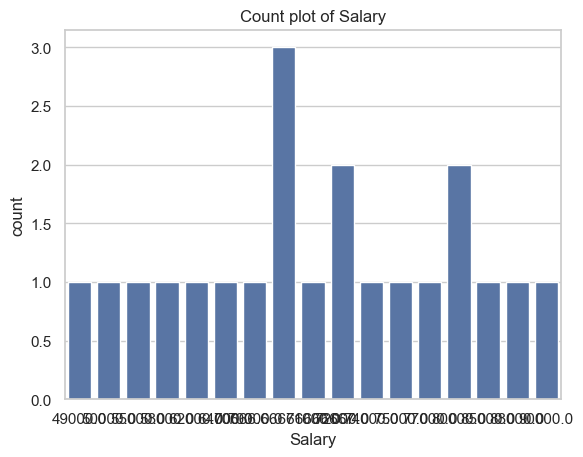

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.countplot(x=df["Salary"])
ax.set_title('Count plot of Salary')
plt.show()

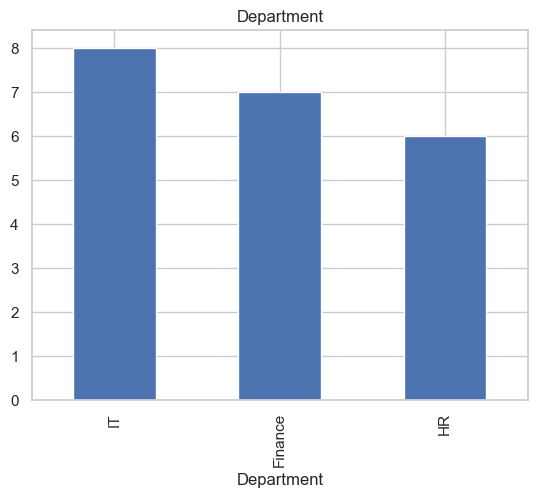

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Department'].value_counts().plot(kind='bar')
plt.title('Department')
plt.show()

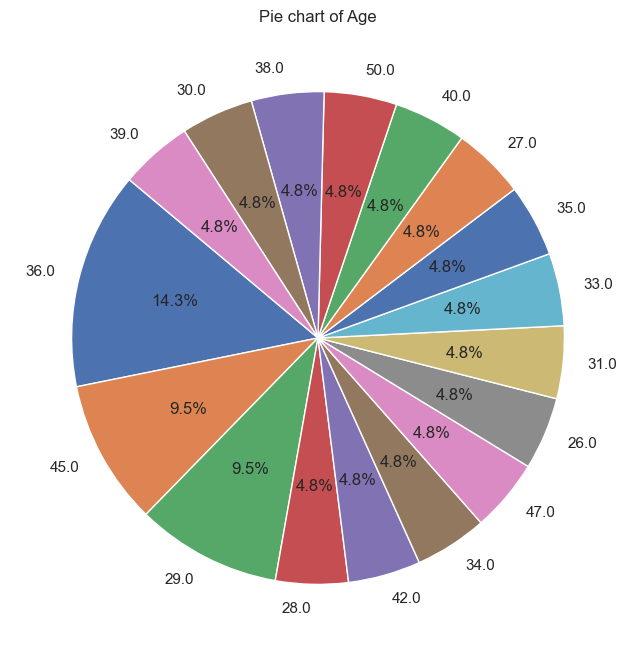

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

age_counts = df["Age"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of Age')
plt.show()

# duplicate checking

In [2]:
import os
print(os.getcwd())

import pandas as pd

df = pd.read_csv("C:\\Users\\mohsi\\Downloads\\employee_data.csv")

#
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


df_cleaned = df.drop_duplicates()


df_cleaned.to_csv('C:\\Users\\mohsi\\Downloads\\employee_data_cleaned.csv', index=False)

print("Duplicates removed and cleaned file saved as 'df_cleaned.to_csv'")

c:\Users\mohsi\OneDrive\Desktop
Number of duplicate rows: 0
Duplicates removed and cleaned file saved as 'df_cleaned.to_csv'


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\mohsi\\Downloads\\employee_data.csv")

required_columns = ['Salary', 'PerformanceScore']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame")

scaler = StandardScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])


df.to_csv('employee_data_standardized.csv', index=False)

print("Salary and Performance Score columns have been standardized and saved as 'employee_data_standardized.csv'")

Salary and Performance Score columns have been standardized and saved as 'employee_data_standardized.csv'


# encoding

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:\\Users\\mohsi\\Downloads\\employee_data.csv")

required_columns = ['Salary', 'PerformanceScore', 'Department']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in DataFrame")

scaler = StandardScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

df_encoded = pd.get_dummies(df, columns=['Department'], drop_first=True)


df_encoded.to_csv('employee_data_standardized_encoded.csv', index=False)

print("Salary and Performance Score columns have been standardized and 'Department' column has been encoded. The result is saved as 'employee_data_standardized_encoded.csv'")

Salary and Performance Score columns have been standardized and 'Department' column has been encoded. The result is saved as 'employee_data_standardized_encoded.csv'


In [6]:
import pandas as pd

df = pd.read_csv('C:\\Users\\mohsi\\Downloads\\employee_data.csv')

df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])  
df['Years_at_Company'] = (pd.Timestamp.now() - df['JoiningDate']).dt.days // 365  
print("\nFinal DataFrame:")
print(df.head())


Final DataFrame:
   EmployeeID           Name   Age Department   Salary JoiningDate  \
0           1       John Doe  28.0         HR  50000.0  2019-01-06   
1           2     Jane Smith   NaN         IT      NaN  2018-03-15   
2           3    Alice Brown   NaN         IT  70000.0  2020-01-20   
3           4    Bob Johnson  45.0    Finance  80000.0  2015-09-30   
4           5  Charlie Black  30.0         HR      NaN  2021-10-02   

   PerformanceScore  Years_at_Company  
0                 4               5.0  
1                 5               6.0  
2                 3               4.0  
3                 2               8.0  
4                 4               2.0  


C:\Users\mohsi\AppData\Local\Temp\ipykernel_6472\2064228870.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])  # Ensure JoiningDate is in datetime format
